<a href="https://colab.research.google.com/github/jmorkos/Jeffrey/blob/main/HW5DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
gpu_boole = torch.cuda.is_available()

In [20]:

import pandas as pd
import torch
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [22]:
#Problem 1: Logistic Regression using Statsmodels
data = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv")
data = data.assign(x = (data.T2 - np.mean(data.T2)) / np.std(data.T2))
def normalize(x):
  return (x - np.mean(x)) / np.std(x)
data=data.assign(y=(data.GOLD_Lesions))
LR = smf.logit('y ~ x', data = data).fit()
LR.summary()




Optimization terminated successfully.
         Current function value: 0.687421
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                0.008262
Time:                        00:33:55   Log-Likelihood:                -68.742
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                    0.2845
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.201      0.002      0.998      -0.394       0.395
x              0.2159      0.204      1.061      0.289      -0.183       0.615
==============================================================================
"""

In [23]:
#Problem 1 using PyTorch
xtraining = torch.from_numpy(data['x'].values)
ytraining = torch.from_numpy(data['y'].values)
x_torch = xtraining.float()
y_torch= ytraining.float()
x_torch_training = x_torch.unsqueeze(1)
y_torch_training= y_torch.unsqueeze(1)
class LogisticRegression(torch.nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.linear = torch.nn.Linear(1, 1, bias = True)
  def forward(self, x):
    y_pred_torch = torch.sigmoid(self.linear(x))
    return y_pred_torch
model=LogisticRegression()
loss_function=torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
for i in range(100000):
  y_torch=model(x_torch_training)
  loss=loss_function(y_torch, y_torch_training)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




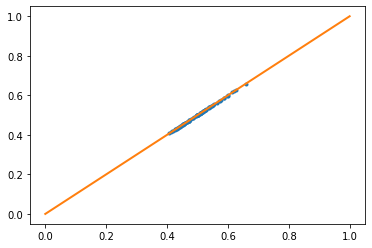

In [14]:
#Comparing the two methods
y_stats = 1 / (1 + np.exp(-LR.fittedvalues))
y_torch_line=y_torch.detach().numpy().reshape(-1)
plt.plot(y_stats, y_torch_line,  ".")
plt.plot([0, 1], [0, 1], linewidth=2)
#The two models are really close when pytorch is allowed to iterate 100,000 times

In [15]:
for x in model.parameters():
  print(x)
print(LR.summary())
#same as listed above in the stats.models.summary

Parameter containing:
tensor([[0.2159]], requires_grad=True)
Parameter containing:
tensor([0.0005], requires_grad=True)
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Oct 2020   Pseudo R-squ.:                0.008262
Time:                        00:30:48   Log-Likelihood:                -68.742
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                    0.2845
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.201      0.002      0.998      -0.394       0.395
x          

In [16]:
url='https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
data=pd.read_csv(url)
list_of_data=[]
categorical_columns=['color','clarity', 'cut']
for i in categorical_columns:
  data1=pd.get_dummies(data[i], drop_first=True)
  list_of_data.append(data1)
#for i in range(len(list_of_data)):
#data_final=pd.concat([data,list_of_data[i]])
data_final=pd.concat(list_of_data, axis=1).fillna(0)
#print(data_final)
c=pd.concat([data, data_final], axis=1).fillna(0)
#print(data.shape)
print(c)
c=c.drop(columns=["cut", "color", "clarity","depth", "table", "x", "y", "z"])
c.rename(columns={'Very Good':'Very_Good'}, inplace=True)
print(c.columns)
trainFraction = .75
sample = np.random.uniform(size = 53940) < trainFraction
trainingDat = c[sample]
testingDat = c[~sample]

Y=trainingDat['price']
X=trainingDat.drop(columns='price')
X_test=testingDat.drop(columns='price')
Y_test=testingDat['price']
X_test=X_test.assign(carat_norm=normalize(X_test.carat))
X_test=X_test.drop(columns='carat')
#X_test=normalize(X_test)

X=X.assign(carat_norm=normalize(X.carat))
X=X.drop(columns='carat')

#Y_test=normalize(Y_test)

Y = pd.DataFrame.to_numpy(Y)
X = pd.DataFrame.to_numpy(X)
Y_test = pd.DataFrame.to_numpy(Y_test)
X_test = pd.DataFrame.to_numpy(X_test)
X = torch.from_numpy(X).float()
X_test= torch.from_numpy(X_test).float()
Y=torch.from_numpy(Y).float()
Y_test=torch.from_numpy(Y_test).float()
print(X.shape)

       carat        cut color clarity  ...  Good  Ideal  Premium  Very Good
0       0.23      Ideal     E     SI2  ...     0      1        0          0
1       0.21    Premium     E     SI1  ...     0      0        1          0
2       0.23       Good     E     VS1  ...     1      0        0          0
3       0.29    Premium     I     VS2  ...     0      0        1          0
4       0.31       Good     J     SI2  ...     1      0        0          0
...      ...        ...   ...     ...  ...   ...    ...      ...        ...
53935   0.72      Ideal     D     SI1  ...     0      1        0          0
53936   0.72       Good     D     SI1  ...     1      0        0          0
53937   0.70  Very Good     D     SI1  ...     0      0        0          1
53938   0.86    Premium     H     SI2  ...     0      0        1          0
53939   0.75      Ideal     D     SI2  ...     0      1        0          0

[53940 rows x 27 columns]
Index(['carat', 'price', 'E', 'F', 'G', 'H', 'I', 'J', 'IF', 

In [17]:

model=torch.nn.Sequential(torch.nn.Linear(18,3), torch.nn.ReLU(), torch.nn.Linear(3,1))
model=model.cuda()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

In [18]:

for i in range(5000):
  y_pred=model(X)
  loss=loss_function(y_pred, Y)
  optimizer.zero_grad()
  loss.backward()
  print(i)
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([40327])) that is different to the input size (torch.Size([40327, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [21]:
!install pip

install: missing destination file operand after 'pip'
Try 'install --help' for more information.


In [ ]:
pip install --upgrade jupyter_http_over_ws>=0.0.7 && \
  jupyter serverextension enable --py jupyter_http_over_ws